Data Wrangling(1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
df = pd.read_csv("D:/AI, ML, DL/Prime Classes/Machine Learning/raw_data (1).csv", header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]



In [5]:
df.columns = headers
print(df.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [6]:
df.rows = headers
print(df.head())
print(df.size)

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

<ipython-input-6-30da71978971>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.rows = headers


In [7]:
print(df.columns)
print(df.shape)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')
(205, 26)


In [8]:
df.to_csv("D:/AI, ML, DL/Prime Classes/Machine Learning/auto.csv", index= False)

json : pd.read_json() df.to_json()
json : pd.read_excel() df.to_excel()
json : pd.read_hdf() df.to_hdf()

In [9]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [11]:
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [12]:
df.describe(include = "object")

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


In [13]:
df[['length', 'compression-ratio']].describe()

,length,compression-ratio
count,205.000000,205.000000
mean,174.049268,10.142537
std,12.337289,3.972040
min,141.100000,7.000000
25%,166.300000,8.600000
50%,173.200000,9.000000
75%,183.100000,9.400000
max,208.100000,23.000000


In [14]:
df[['make', 'fuel-system']].describe()

,make,fuel-system
count,205,205
unique,22,8
top,toyota,mpfi
freq,32,94


In [15]:
data1= df[['length']]
data1.head()

,length
0,168.8
1,168.8
2,171.2
3,176.6
4,176.6


In [16]:
data1.mean()

length    174.049268
dtype: float64

In [17]:
data1.median()

length    173.2
dtype: float64

In [18]:
data1.std()

length    12.337289
dtype: float64

In [19]:
print(data1.shape)
print(np.mean(data1))
print(np.median(data1))
print(stats.mode(data1))
print(np.var(data1))
print(np.std(data1))

(205, 1)
length    174.049268
dtype: float64
173.2
ModeResult(mode=array([[157.3]]), count=array([[15]]))
length    151.466207
dtype: float64
length    12.307161
dtype: float64


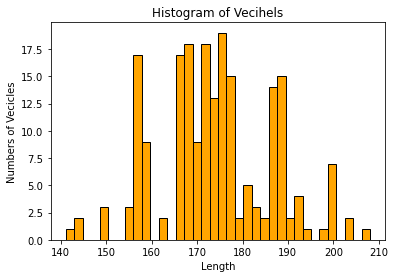

In [27]:
plt.hist(df['length'], color = 'orange', edgecolor = 'black', bins = 36)
plt.title('Histogram of Vecihels')
plt.xlabel('Length')
plt.ylabel('Numbers of Vecicles')
plt.show()

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


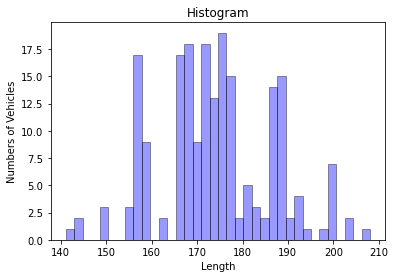

In [21]:
sns.distplot(data1['length'], hist=True, kde=False, bins= 36, color='blue', hist_kws={'edgecolor':'black'})
plt.title('Histogram')
plt.xlabel('Length')
plt.ylabel('Numbers of Vehicles')
plt.show()

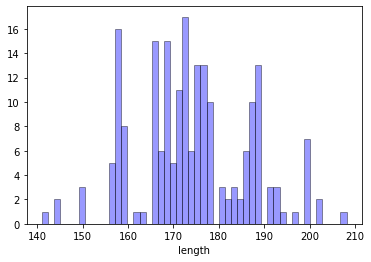

In [22]:
sns.distplot(data1['length'], hist=True, kde=False, bins= 50, color='blue', hist_kws={'edgecolor':'black'})
plt.show()

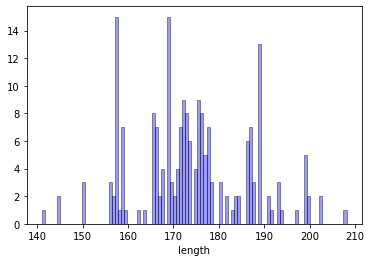

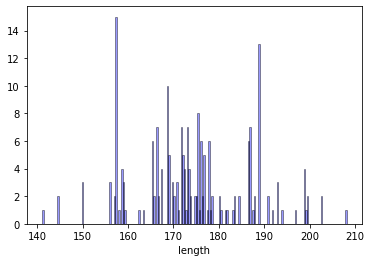

In [23]:
sns.distplot(data1['length'], hist=True, kde=False, bins= 100, color='blue', hist_kws={'edgecolor':'black'})
plt.show()

sns.distplot(data1['length'], hist=True, kde=False, bins= 200, color='blue', hist_kws={'edgecolor':'black'})
plt.show()

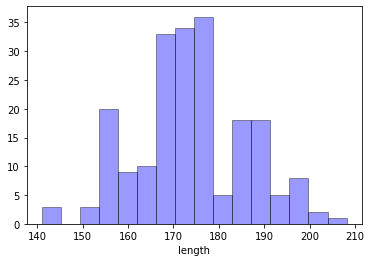

In [24]:
sns.distplot(data1['length'], hist=True, kde=False, bins= 16, color='blue', hist_kws={'edgecolor':'black'})
plt.show()

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length', ylabel='Density'>

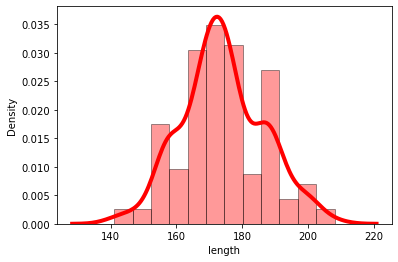

In [29]:
sns.distplot(data1['length'], hist=True, kde=True, bins = 12, color='red', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


AttributeError: 'Line2D' object has no property 'shape'

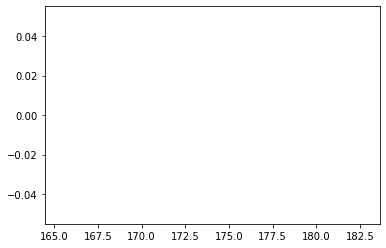

In [30]:
sns.distplot(data1['length'], hist=False, kde=True, kde_kws= {'shape':True, 'linewidth':3})

# skewness and Kurtoisis

In [ ]:
print(skew(data1))
print(kurtosis(data1))

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length'>

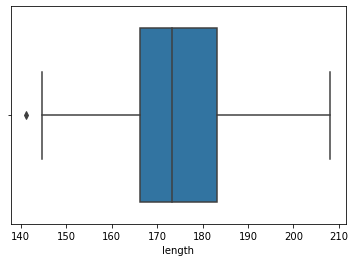

In [38]:
sns.boxplot(data1['length'])

In [ ]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
(data1 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))

In [ ]:
print(data1.shape)
data2 = data1[~((data1 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data2)

In [ ]:
data1= df[['price']]
data1.head()

In [ ]:
print(data1.shape)
print(np.mean(data1))
print(np.median(data1))
print(stats.mode(data1))
print(np.var(data1))
print(np.std(data1))

In [ ]:
plt.hist(df['price'], color = 'orange', edgecolor = 'black', bins = 36)
plt.title('Histogram for price')
plt.xlabel('Price')
plt.ylabel('no')
plt.show()

In [ ]:
sns.distplot(data1['price'], hist=True, kde=False, bins= 16, color='blue', hist_kws={'edgecolor':'black'})
plt.show()

In [ ]:
df.replace("?", np.nan, inplace = True)
df.head()

In [ ]:
missing_data = df.isnull()
print(missing_data.head())

In [ ]:
for column in missing_data.column.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

In [ ]:
avg_1= df["normalized-losses"].astype("float").mean(axis =0)
print(avg_1)

In [ ]:
df["normalized-losses"].replace(np.nan, avg_1, inplace= True)

In [ ]:
avg_2= df['bore'].astype('float').mean(axis=0)

In [ ]:
print(avg_2)

In [ ]:
avg_1= df["normalized-losses"].astype("float").mean(axis =0)
print(avg_1)

df["normalized-losses"].replace(np.nan, avg_1, inplace= True)

avg_2= df['bore'].astype('float').mean(axis=0)

print(avg_2)

In [ ]:
avg_2 = df['bore'].astype('float').mean(axis = 0)
print(avg_2)

In [ ]:
df['bore'].raplace(np.nan, avg_2 , inplace = True)

In [ ]:
avg_ = df['stroke'].astype('float').mean(axis = 0)
print(avg_3)

avg_3 = df['stroke'].astype(np.nan, avg_3, inplace = True)

In [ ]:
df['num-of-doors'].value_counts()

In [ ]:
df['num-of-doors'].value_counts().idxmax()

In [ ]:
df['num-of-doors'].replace(np.nan, "four", inplace = True)

In [ ]:
df.dropna(subset=["price"], axis=0, inplace =True)

In [ ]:
df.reset_index(drop =True, inplace= True)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
missing_data = df.isnull()
print(missing_data.head())

In [ ]:
df.dtypes

In [ ]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")

In [ ]:
df.dtypes

In [ ]:
print(df.shape)
print(df.head())
df['city-L/100km'] = 235/df["city-mpg"]
print(df.head())
print(df.shape)